# Mental Health in Tech Industry Survey Analysis

This Jupyter notebook presents an analysis of a survey dataset focusing on mental health in the tech industry. The objective is to build and evaluate a machine learning model capable of predicting whether employees in tech companies seek help for mental health issues. The analysis includes Exploratory Data Analysis (EDA), data preprocessing, model training, and evaluation. This notebook is intended for a machine learning audience and aims to provide clear explanations of each step along with the outcomes.
    

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset to take a look at it


## Loading the Dataset
The dataset is loaded into a pandas DataFrame to begin the analysis.

In [4]:
file_path = 'data/survey_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset


In [5]:
data.head()

,age,gender,country,state,is_self_employed,is_family_history_of_mental_illness,is_treatment_sought,interference_with_work,number_of_employees_in_organization,is_employer_tech_company,mental_health_benefits,mental_healthcare_options,mental_health_employee_wellness_program,mental_health_employee_resources,employee_anonymity_protected,mental_health_leave,willingness_to_discuss_with_coworkers,willingness_to_discuss_with_supervisors
0,25.0,Male,United States of America,Nebraska,False,False,False,Not applicable to me,26-100,True,I don't know,No,Yes,Yes,I don't know,Very easy,Physical health,Yes
1,51.0,Male,United States of America,Nebraska,False,True,False,Sometimes,26-100,True,Yes,No,No,Yes,Yes,I don't know,Physical health,Maybe
2,27.0,Male,United States of America,Illinois,False,NaN,False,Not applicable to me,26-100,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,Same level of comfort for each,No
3,37.0,Male,United States of America,Nebraska,False,True,False,Not applicable to me,100-500,True,I don't know,No,Yes,Yes,Yes,Very easy,Physical health,Yes
4,46.0,Male,United States of America,Nebraska,False,False,False,Not applicable to me,26-100,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,Physical health,No


# Performing Exploratory Data Analysis (EDA)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns


## Initial Data Exploration
Exploring the basic statistical properties of the dataset to understand the distribution of numerical features and the uniqueness of categorical features.

In [7]:
numerical_summary = data.describe()

# Count of unique values for categorical columns


## Initial Data Exploration
Exploring the basic statistical properties of the dataset to understand the distribution of numerical features and the uniqueness of categorical features.

In [8]:
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns
categorical_summary = data[categorical_columns].nunique()

# Checking for missing values


In [9]:
missing_values = data.isnull().sum()

# Distribution of the target variable

## Model Training
Using GridSearchCV to find the best parameters for various models and selecting the best model based on performance metrics.

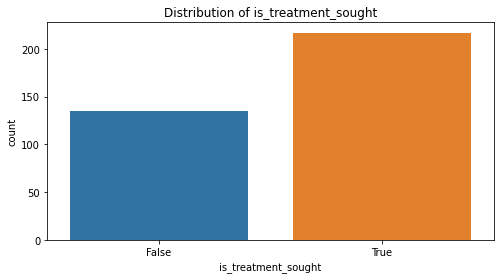

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(x='is_treatment_sought', data=data)
plt.title('Distribution of is_treatment_sought')
plt.show()

numerical_summary, categorical_summary, missing_values


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score



# Define the models and their hyperparameters for grid search


In [11]:
model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10, 100]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'linear']
        }
    }
}

## Data Preprocessing
Splitting the dataset into training and testing sets and performing necessary preprocessing steps such as encoding categorical variables and scaling numerical features.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

# Splitting the data into features and target variable
X = data.drop('is_treatment_sought', axis=1)
y = data['is_treatment_sought']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists of different types of columns (numerical and categorical)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Creating transformers for the preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply the preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape

with open('model/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)



# Grid search for best parameters and model

## Model Training
Using GridSearchCV to find the best parameters for various models and selecting the best model based on performance metrics.

In [60]:
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_preprocessed, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

## Creating a DataFrame to display the results of the grid search


In [61]:
model_comparison = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
model_comparison



,model,best_score,best_params
0,LogisticRegression,0.793860,{'C': 0.1}
1,RandomForestClassifier,0.783083,"{'max_depth': 20, 'n_estimators': 50}"
2,SVC,0.804323,"{'C': 0.1, 'kernel': 'linear'}"


# Model selection summary

Three different machine learning models were evaluated using GridSearchCV, which performed hyperparameter tuning and cross-validation to find the best model and parameters. The models and their best performance scores are:

Based on these results, the Support Vector Classifier (SVC) with C=0.1 and kernel='linear' is the best-performing model for predicting whether tech company employees seek help for mental health.

# Model exporting

## Model Evaluation
Evaluating the selected model on the test set using confusion matrix and classification report to understand its performance.

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

# Creating the final model with the best parameters

In [63]:
final_model = SVC(C=0.1, kernel='linear')



# Training the final model


In [64]:
final_model.fit(X_train_preprocessed, y_train)



SVC(C=0.1, kernel='linear')

# Predicting on the test set


In [65]:
y_pred = final_model.predict(X_test_preprocessed)



# Evaluating the model


## Model Evaluation
Evaluating the selected model on the test set using confusion matrix and classification report to understand its performance.

              precision    recall  f1-score   support

       False       0.63      0.73      0.68        26
        True       0.83      0.76      0.79        45

    accuracy                           0.75        71
   macro avg       0.73      0.74      0.73        71
weighted avg       0.76      0.75      0.75        71



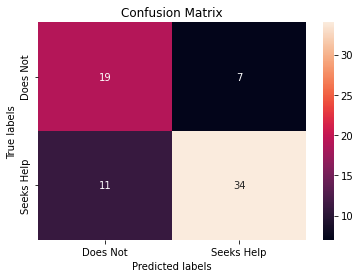

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Does Not','Seeks Help']); ax.yaxis.set_ticklabels(['Does Not','Seeks Help']);


print(class_report)


# Saving the model as a pickle file


## Saving the Model
Saving the final model as a pickle file for deployment.

In [70]:
model_filename = 'model/final_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(final_model, file)